In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# plots
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
%matplotlib inline

## Partimos de los datos genereados por Notebook creacionFeatures

In [2]:
df_train = pd.read_csv('../data/train_con_features.csv', index_col='Unnamed: 0')
df_test = pd.read_csv('../data/test_con_features.csv', index_col='Unnamed: 0')

In [3]:
df_train.columns

Index(['id', 'titulo', 'descripcion', 'tipodepropiedad', 'direccion', 'ciudad',
       'provincia', 'antiguedad', 'habitaciones', 'garages', 'banos',
       'metroscubiertos', 'metrostotales', 'idzona', 'lat', 'lng', 'fecha',
       'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas',
       'centroscomercialescercanos', 'precio', 'cantidad_amenities',
       'cantidad_servicios', 'relacion_metros', 'metros_por_habitacion',
       'metros_por_bano', 'metros_por_amenities', 'bano_por_habitacion',
       'garages_por_habitacion', 'precio_prom_ciudad', 'precio_prom_propiedad',
       'provincia_top5', 'es_Apartamento', 'es_Casa_en_condominio', 'es_Casa',
       'es_Terreno', 'es_Terreno_comercial', 'es_Local_Comercial',
       'es_Quinta_Vacacional', 'es_Oficina_comercial', 'es_Edificio',
       'es_Casa_uso_de_suelo', 'es_Local_en_centro_comercial',
       'es_Bodega_comercial', 'es_Otros', 'es_Villa', 'es_Duplex',
       'es_Inmuebles_productivos_urbanos', 'es_Departamento_Compar

### Eliminamos los features generados relacionados con TipoPropiedad

In [4]:
lst_tipos_propiedades = ['es_Apartamento', 'es_Casa_en_condominio', 'es_Casa', 'es_Terreno',
                         'es_Terreno_comercial', 'es_Local_Comercial', 'es_Quinta_Vacacional',
                         'es_Oficina_comercial', 'es_Edificio', 'es_Casa_uso_de_suelo',
                         'es_Local_en_centro_comercial', 'es_Bodega_comercial', 'es_Otros',
                         'es_Villa', 'es_Duplex', 'es_Inmuebles_productivos_urbanos',
                         'es_Departamento_Compartido', 'es_Nave_industrial', 'es_Rancho',
                         'es_Terreno_industrial', 'es_Huerta', 'es_Lote', 'es_Hospedaje', 'es_Garage']

df_train = df_train.drop(lst_tipos_propiedades, axis=1)
df_test = df_test.drop(lst_tipos_propiedades, axis=1)
df_train.columns

Index(['id', 'titulo', 'descripcion', 'tipodepropiedad', 'direccion', 'ciudad',
       'provincia', 'antiguedad', 'habitaciones', 'garages', 'banos',
       'metroscubiertos', 'metrostotales', 'idzona', 'lat', 'lng', 'fecha',
       'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas',
       'centroscomercialescercanos', 'precio', 'cantidad_amenities',
       'cantidad_servicios', 'relacion_metros', 'metros_por_habitacion',
       'metros_por_bano', 'metros_por_amenities', 'bano_por_habitacion',
       'garages_por_habitacion', 'precio_prom_ciudad', 'precio_prom_propiedad',
       'provincia_top5', 'seguridad_descripcion', 'moderno_descripcion',
       'hermoso_descripcion', 'estado_descripcion', 'seguridad_titulo',
       'moderno_titulo', 'hermoso_titulo', 'estado_titulo',
       'cantidad_palabras_descripcion', 'relacion_palabras_descripcion',
       'es_avenida', 'es_ciudad_capital', 'ciudad_turistica_top15', 'anio',
       'mes'],
      dtype='object')

### Eliminamos features repetidos y complejos

In [5]:
drop = ['titulo', 'descripcion', 'direccion', 'fecha']

df_train = df_train.drop(drop, axis=1)
df_test = df_test.drop(drop, axis=1)
df_train.head()

,id,tipodepropiedad,ciudad,provincia,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,...,moderno_titulo,hermoso_titulo,estado_titulo,cantidad_palabras_descripcion,relacion_palabras_descripcion,es_avenida,es_ciudad_capital,ciudad_turistica_top15,anio,mes
0,254099,Apartamento,Benito Juárez,Distrito Federal,8.116114,2.0,1.0,2.0,80.0,80.0,...,0,0,0,0,0.000000,1,0,0,2015,8
1,53461,Casa en condominio,La Magdalena Contreras,Distrito Federal,10.000000,3.0,2.0,2.0,268.0,180.0,...,0,0,0,1,0.007968,1,0,0,2013,6
2,247984,Casa,Tonalá,Jalisco,5.000000,3.0,2.0,2.0,144.0,166.0,...,0,0,0,10,0.046957,0,0,0,2015,10
3,209067,Casa,Zinacantepec,Edo. de México,1.000000,2.0,1.0,1.0,63.0,67.0,...,0,0,0,0,0.000000,0,0,0,2012,3
4,185997,Apartamento,Zapopan,Jalisco,10.000000,2.0,1.0,1.0,95.0,95.0,...,0,0,0,1,0.074108,0,0,0,2016,6


In [6]:
df_train.shape

(240000, 45)

## Aplicamos encodings a los features categoricos

In [7]:
import category_encoders as ce

cat_features = ['tipodepropiedad', 'ciudad', 'provincia']

cb_features = ['ciudad']
oh_features = ['tipodepropiedad', 'provincia']

#Elegimos un metodo de encode para estos features, y comentamos el resto de los metodos
#O elegimos distintos metodos dependiendo del feature

### CatBoost Encoding

In [8]:
'''catb_enc = ce.CatBoostEncoder(cols=cb_features)
catb_enc.fit(df_train[cb_features], df_train['precio'])

df_train = df_train.join(catb_enc.transform(df_train[cb_features]).add_suffix('_cb'))
df_test = df_test.join(catb_enc.transform(df_test[cb_features]).add_suffix('_cb')'''

"catb_enc = ce.CatBoostEncoder(cols=cb_features)\ncatb_enc.fit(df_train[cb_features], df_train['precio'])\n\ndf_train = df_train.join(catb_enc.transform(df_train[cb_features]).add_suffix('_cb'))\ndf_test = df_test.join(catb_enc.transform(df_test[cb_features]).add_suffix('_cb')"

### Target Encoding

In [9]:
'''target_enc = ce.TargetEncoder(cols=cat_features)
target_enc.fit(df_train[cat_features], df_train['precio'])

df_train = df_train.join(target_enc.transform(df_train[cat_features]).add_suffix('_target'))
df_test = df_test.join(target_enc.transform(df_test[cat_features]).add_suffix('_target'))'''

"target_enc = ce.TargetEncoder(cols=cat_features)\ntarget_enc.fit(df_train[cat_features], df_train['precio'])\n\ndf_train = df_train.join(target_enc.transform(df_train[cat_features]).add_suffix('_target'))\ndf_test = df_test.join(target_enc.transform(df_test[cat_features]).add_suffix('_target'))"

### Count Encoding

In [10]:
count_enc = ce.CountEncoder()
count_encoded = count_enc.fit_transform(df_train[cat_features])

df_train = df_train.join(count_encoded.add_suffix("_count"))
df_test = df_test.join(count_encoded.add_suffix("_count"))

### Binary Encoding

In [11]:
'''binary_enc = ce.BinaryEncoder()
binary_encoded = binary_enc.fit_transform(df_train[cat_features])

df_train = df_train.join(binary_encoded.add_suffix("_binary"))
df_test = df_test.join(binary_encoded.add_suffix("_binary"))'''

'binary_enc = ce.BinaryEncoder()\nbinary_encoded = binary_enc.fit_transform(df_train[cat_features])\n\ndf_train = df_train.join(binary_encoded.add_suffix("_binary"))\ndf_test = df_test.join(binary_encoded.add_suffix("_binary"))'

### One Hot Encoding

In [12]:
'''one_hot_enc = ce.OneHotEncoder()
one_hot_encoded = one_hot_enc.fit_transform(df_train[oh_features])

df_train = df_train.join(one_hot_encoded.add_suffix("_oh"))
df_test = df_test.join(one_hot_encoded.add_suffix("_oh"))'''

'one_hot_enc = ce.OneHotEncoder()\none_hot_encoded = one_hot_enc.fit_transform(df_train[oh_features])\n\ndf_train = df_train.join(one_hot_encoded.add_suffix("_oh"))\ndf_test = df_test.join(one_hot_encoded.add_suffix("_oh"))'

In [13]:
df_train.shape

(240000, 48)

In [14]:
df_test.shape

(60000, 47)

In [15]:
#Dropeamos los features con strings ya encodeados
#Dejamos los dataset listos para modelar
df_train = df_train.drop(cat_features, axis=1)
df_test = df_test.drop(cat_features, axis=1)

## Feature Selection

In [16]:
from catboost import CatBoostRegressor

feature_cols = df_train.columns.tolist()
feature_cols.remove('precio')

X = df_train[feature_cols]
y = df_train['precio']

CatBoost = CatBoostRegressor(loss_function='MAE')
CatBoost_fit = CatBoost.fit(X, y)

0:	learn: 1490107.0578028	total: 145ms	remaining: 2m 25s
1:	learn: 1464339.0724069	total: 222ms	remaining: 1m 50s
2:	learn: 1437897.8089907	total: 301ms	remaining: 1m 39s
3:	learn: 1413035.7533159	total: 383ms	remaining: 1m 35s
4:	learn: 1388960.7265049	total: 462ms	remaining: 1m 31s
5:	learn: 1365598.2210512	total: 539ms	remaining: 1m 29s
6:	learn: 1341929.3032924	total: 624ms	remaining: 1m 28s
7:	learn: 1319748.1901587	total: 706ms	remaining: 1m 27s
8:	learn: 1299232.2670333	total: 781ms	remaining: 1m 25s
9:	learn: 1278516.2027755	total: 865ms	remaining: 1m 25s
10:	learn: 1259110.4428459	total: 944ms	remaining: 1m 24s
11:	learn: 1239946.2537853	total: 1.02s	remaining: 1m 24s
12:	learn: 1221456.2239440	total: 1.1s	remaining: 1m 23s
13:	learn: 1204504.2909146	total: 1.18s	remaining: 1m 23s
14:	learn: 1188109.5353376	total: 1.26s	remaining: 1m 22s
15:	learn: 1172917.4961714	total: 1.34s	remaining: 1m 22s
16:	learn: 1157780.3581602	total: 1.42s	remaining: 1m 22s
17:	learn: 1143526.671361

144:	learn: 728701.6893233	total: 11.3s	remaining: 1m 6s
145:	learn: 727825.4279347	total: 11.4s	remaining: 1m 6s
146:	learn: 726962.4612020	total: 11.5s	remaining: 1m 6s
147:	learn: 726371.5296070	total: 11.5s	remaining: 1m 6s
148:	learn: 725855.7923492	total: 11.6s	remaining: 1m 6s
149:	learn: 724952.0605748	total: 11.7s	remaining: 1m 6s
150:	learn: 724247.2160367	total: 11.8s	remaining: 1m 6s
151:	learn: 723958.2480073	total: 11.8s	remaining: 1m 6s
152:	learn: 723276.9709500	total: 11.9s	remaining: 1m 6s
153:	learn: 722670.4377092	total: 12s	remaining: 1m 5s
154:	learn: 721991.9196930	total: 12.1s	remaining: 1m 5s
155:	learn: 721522.3991165	total: 12.2s	remaining: 1m 5s
156:	learn: 721169.3887821	total: 12.2s	remaining: 1m 5s
157:	learn: 720384.9209202	total: 12.3s	remaining: 1m 5s
158:	learn: 720079.2867608	total: 12.4s	remaining: 1m 5s
159:	learn: 719675.5325785	total: 12.5s	remaining: 1m 5s
160:	learn: 719177.5356945	total: 12.5s	remaining: 1m 5s
161:	learn: 718170.7466189	total:

291:	learn: 671898.6247870	total: 22.7s	remaining: 55s
292:	learn: 671760.6966666	total: 22.7s	remaining: 54.9s
293:	learn: 671403.7419922	total: 22.8s	remaining: 54.8s
294:	learn: 671260.3538878	total: 22.9s	remaining: 54.7s
295:	learn: 670997.4152468	total: 23s	remaining: 54.6s
296:	learn: 670804.8146333	total: 23.1s	remaining: 54.6s
297:	learn: 670492.9642829	total: 23.1s	remaining: 54.5s
298:	learn: 670123.4337416	total: 23.2s	remaining: 54.4s
299:	learn: 669988.5999073	total: 23.3s	remaining: 54.4s
300:	learn: 669680.3667446	total: 23.4s	remaining: 54.3s
301:	learn: 669633.3492639	total: 23.4s	remaining: 54.2s
302:	learn: 669259.0005642	total: 23.5s	remaining: 54.1s
303:	learn: 668913.8148284	total: 23.6s	remaining: 54s
304:	learn: 668616.7498172	total: 23.7s	remaining: 54s
305:	learn: 668350.4979473	total: 23.8s	remaining: 53.9s
306:	learn: 668002.8600561	total: 23.8s	remaining: 53.8s
307:	learn: 667645.8080771	total: 23.9s	remaining: 53.7s
308:	learn: 667524.0866117	total: 24s	r

438:	learn: 642839.6423598	total: 34.2s	remaining: 43.7s
439:	learn: 642748.9186766	total: 34.2s	remaining: 43.6s
440:	learn: 642655.1194495	total: 34.3s	remaining: 43.5s
441:	learn: 642590.0212018	total: 34.4s	remaining: 43.4s
442:	learn: 642195.5528574	total: 34.5s	remaining: 43.4s
443:	learn: 642098.4910366	total: 34.6s	remaining: 43.3s
444:	learn: 641804.4926860	total: 34.6s	remaining: 43.2s
445:	learn: 641672.2606279	total: 34.7s	remaining: 43.1s
446:	learn: 641444.0253151	total: 34.8s	remaining: 43s
447:	learn: 641302.3517663	total: 34.9s	remaining: 43s
448:	learn: 641173.6816946	total: 35s	remaining: 42.9s
449:	learn: 640973.0841233	total: 35s	remaining: 42.8s
450:	learn: 640884.3164704	total: 35.1s	remaining: 42.7s
451:	learn: 640836.1152009	total: 35.2s	remaining: 42.7s
452:	learn: 640775.0850150	total: 35.3s	remaining: 42.6s
453:	learn: 640648.6485503	total: 35.3s	remaining: 42.5s
454:	learn: 640511.1400654	total: 35.4s	remaining: 42.4s
455:	learn: 640457.6323468	total: 35.5s

583:	learn: 625345.6686984	total: 46.1s	remaining: 32.8s
584:	learn: 625279.2648658	total: 46.2s	remaining: 32.7s
585:	learn: 625112.5076983	total: 46.2s	remaining: 32.7s
586:	learn: 625072.0093289	total: 46.3s	remaining: 32.6s
587:	learn: 624982.5157375	total: 46.4s	remaining: 32.5s
588:	learn: 624899.9693414	total: 46.5s	remaining: 32.4s
589:	learn: 624828.6023406	total: 46.5s	remaining: 32.3s
590:	learn: 624750.2415642	total: 46.6s	remaining: 32.3s
591:	learn: 624663.1317087	total: 46.7s	remaining: 32.2s
592:	learn: 624620.4269870	total: 46.8s	remaining: 32.1s
593:	learn: 624563.2148103	total: 46.9s	remaining: 32s
594:	learn: 624523.9889933	total: 46.9s	remaining: 31.9s
595:	learn: 624458.9469414	total: 47s	remaining: 31.9s
596:	learn: 624393.3873798	total: 47.1s	remaining: 31.8s
597:	learn: 624236.1690058	total: 47.2s	remaining: 31.7s
598:	learn: 624125.5190145	total: 47.2s	remaining: 31.6s
599:	learn: 624007.2392113	total: 47.3s	remaining: 31.6s
600:	learn: 623932.1735400	total: 4

730:	learn: 612952.8011795	total: 57.5s	remaining: 21.2s
731:	learn: 612879.6218278	total: 57.6s	remaining: 21.1s
732:	learn: 612745.2104183	total: 57.7s	remaining: 21s
733:	learn: 612674.0841395	total: 57.8s	remaining: 20.9s
734:	learn: 612634.6307155	total: 57.8s	remaining: 20.9s
735:	learn: 612589.3347379	total: 57.9s	remaining: 20.8s
736:	learn: 612456.2477299	total: 58s	remaining: 20.7s
737:	learn: 612398.8490653	total: 58.1s	remaining: 20.6s
738:	learn: 612311.3287211	total: 58.2s	remaining: 20.5s
739:	learn: 612232.0854576	total: 58.2s	remaining: 20.5s
740:	learn: 612104.0522067	total: 58.3s	remaining: 20.4s
741:	learn: 611997.1474454	total: 58.4s	remaining: 20.3s
742:	learn: 611960.8746964	total: 58.5s	remaining: 20.2s
743:	learn: 611927.7712711	total: 58.6s	remaining: 20.1s
744:	learn: 611828.4737013	total: 58.6s	remaining: 20.1s
745:	learn: 611765.7404554	total: 58.7s	remaining: 20s
746:	learn: 611737.9799111	total: 58.8s	remaining: 19.9s
747:	learn: 611646.2500741	total: 58.

877:	learn: 604072.8575527	total: 1m 9s	remaining: 9.68s
878:	learn: 604027.2794798	total: 1m 9s	remaining: 9.6s
879:	learn: 604001.0621578	total: 1m 9s	remaining: 9.52s
880:	learn: 603965.1515977	total: 1m 9s	remaining: 9.44s
881:	learn: 603932.9484607	total: 1m 9s	remaining: 9.36s
882:	learn: 603862.4800756	total: 1m 10s	remaining: 9.28s
883:	learn: 603805.2778388	total: 1m 10s	remaining: 9.2s
884:	learn: 603771.7026503	total: 1m 10s	remaining: 9.12s
885:	learn: 603704.2204338	total: 1m 10s	remaining: 9.04s
886:	learn: 603677.8760076	total: 1m 10s	remaining: 8.96s
887:	learn: 603592.7124830	total: 1m 10s	remaining: 8.88s
888:	learn: 603575.3684862	total: 1m 10s	remaining: 8.8s
889:	learn: 603524.4416966	total: 1m 10s	remaining: 8.72s
890:	learn: 603477.4244432	total: 1m 10s	remaining: 8.64s
891:	learn: 603451.9589031	total: 1m 10s	remaining: 8.56s
892:	learn: 603394.6927319	total: 1m 10s	remaining: 8.48s
893:	learn: 603282.2798891	total: 1m 10s	remaining: 8.4s
894:	learn: 603253.6750

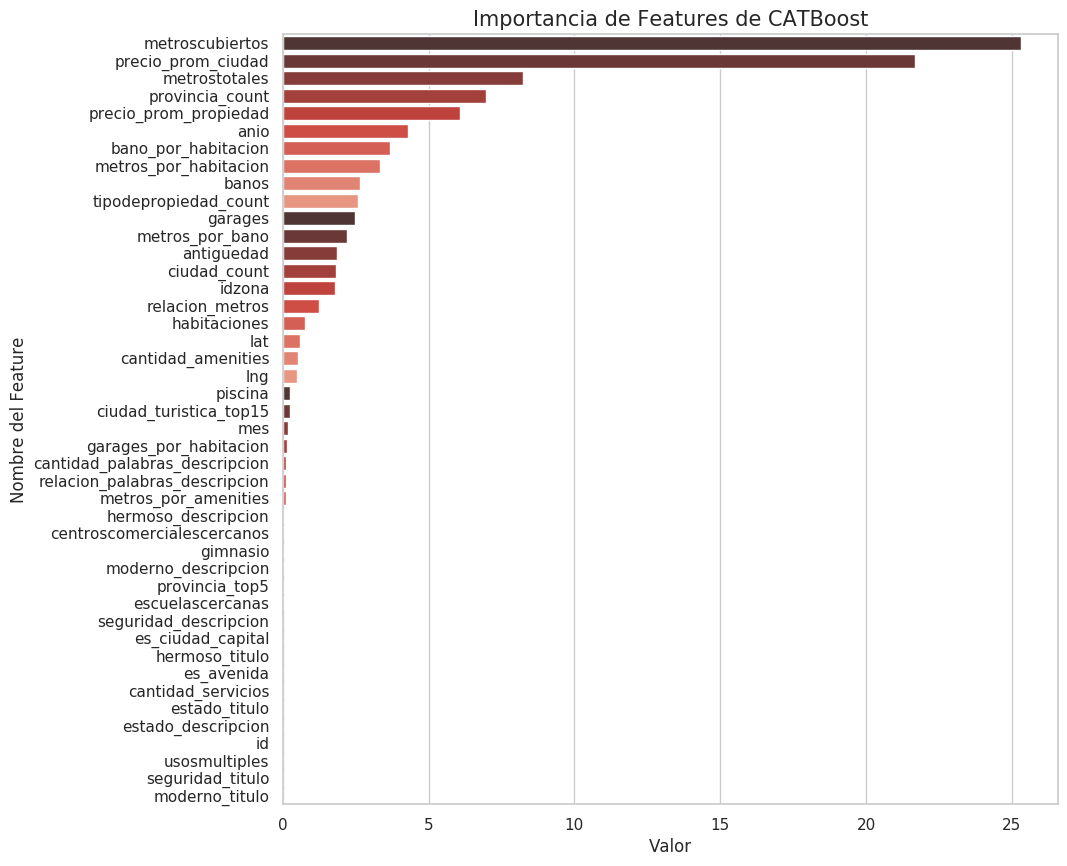

In [17]:
features = pd.DataFrame(index=feature_cols)
features['imp'] = CatBoost_fit.feature_importances_
features = features.sort_values(['imp'], ascending = False)

plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 10)
sns.set(style="whitegrid")

g = sns.barplot(y=features.index, x=features.imp, \
                palette=sns.color_palette("Reds_d", 10));

g.set_title('Importancia de Features de CATBoost', fontsize=15);
g.set_xlabel('Valor');
g.set_ylabel('Nombre del Feature');

### Nos quedamos con los k features mas importantes

In [18]:
k=50

features_to_drop = features.nsmallest((df_train.columns.size - k), 'imp').index.tolist()
if 'id' in features_to_drop: features_to_drop.remove('id')
features_to_drop


[]

In [19]:
#Dropeamos los features menos importantes
df_train = df_train.drop(features_to_drop, axis=1)
df_test = df_test.drop(features_to_drop, axis=1)

## Guardamos features

In [20]:
df_train.to_csv('../data/train_con_features_encoded.csv')
df_test.to_csv('../data/test_con_features_encoded.csv')